In [147]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 12)
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler

Our algorithm works as follows, assuming we have inputs x1,x2,x3,…,xn and value of K

* Step 1 - Pick K random points as cluster centers called centroids.
* Step 2 - Assign each xi to nearest cluster by calculating its distance to each centroid.
* Step 3 - Find new cluster center by taking the average of the assigned points.
* Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

In [155]:
# Importing the dataset
data = pd.read_csv('../datasets/kmeans.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [156]:
s = StandardScaler()

In [157]:
data = s.fit_transform(data)

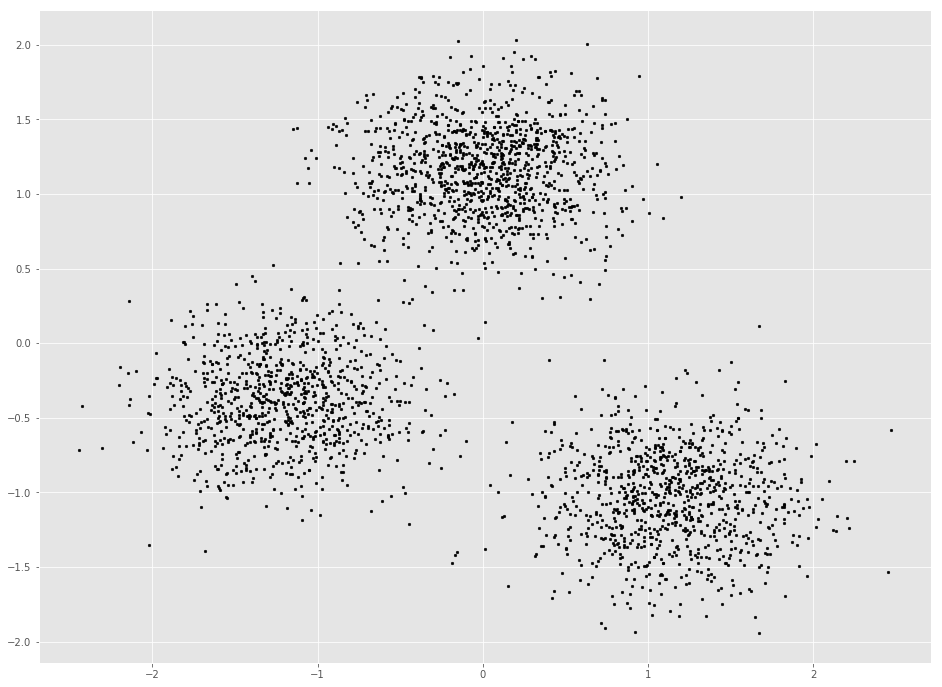

In [158]:
# Getting the values and plotting it
f1 = data[:,0]
f2 = data[:,1]
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [159]:
class kmeans():
    def __init__(self, k, threshold, max_iter):
        self.k = k
        self.threshold = threshold
        self.max_iter = max_iter

    def fit(self, data):
        self.x = data
        self.rows = data.shape[0]
        self.columns = data.shape[1]
        self.min_ = np.min(self.x, axis=0)
        self.max_ = np.max(self.x, axis=0)
        self.c = np.zeros((self.k, self.columns))
        for i in range(self.columns):
            self.c[:, i] = np.random.randint(
                low=self.min_[i], high=self.max_[i], size=self.k)

        self.cluster_mapping = {}
        self.centroid_mapping = {i: [] for i in range(self.k)}
        for iter_ in range(self.max_iter):
            for i in range(self.rows):
                p = self.x[i, :]
                self.cluster_assigned = np.argmin(
                    np.linalg.norm(self.c - p, axis=1))
                self.centroid_mapping[self.cluster_assigned].append(i)
                self.cluster_mapping[i] = self.cluster_assigned
            self.c_old = deepcopy(self.c)
            for i in range(self.k):
                self.c[i, :] = np.mean(
                    self.x[self.centroid_mapping[i], :], axis=0)

            if np.linalg.norm(self.c - self.c_old) < self.threshold:
                print(f"stopped after {iter_} iterations")
                break
            else:
                continue

    def plot(self):
        '''
        for 2-D data only
        '''
        colors = ['r', 'g', 'b', 'y', 'c', 'm']
        fig, ax = plt.subplots()
        for i in range(self.k):
            points = np.array([
                self.x[j] for j in range(len(self.x))
                if self.cluster_mapping[j] == i
            ])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        ax.scatter(self.c[:, 0], self.c[:, 1], marker='*', s=200, c='#050505')

In [160]:
m = kmeans(3, .01, 100)

In [161]:
m.fit(data)

/Users/Shikhar/anaconda3/envs/fastai/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Shikhar/anaconda3/envs/fastai/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


stopped after 26 iterations


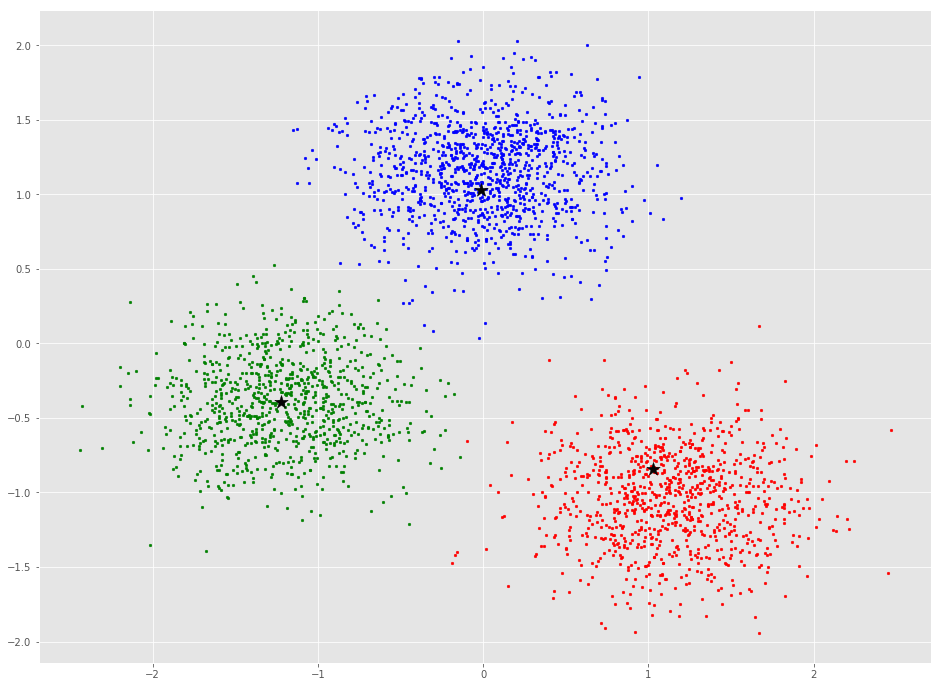

In [162]:
m.plot()